In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



In [9]:

# Selecting three features for 3D visualization
selected_features = ['mean radius', 'mean texture', 'mean perimeter']
X = df[selected_features].values
y = df['target'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.956140350877193
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:

# SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9298245614035088
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



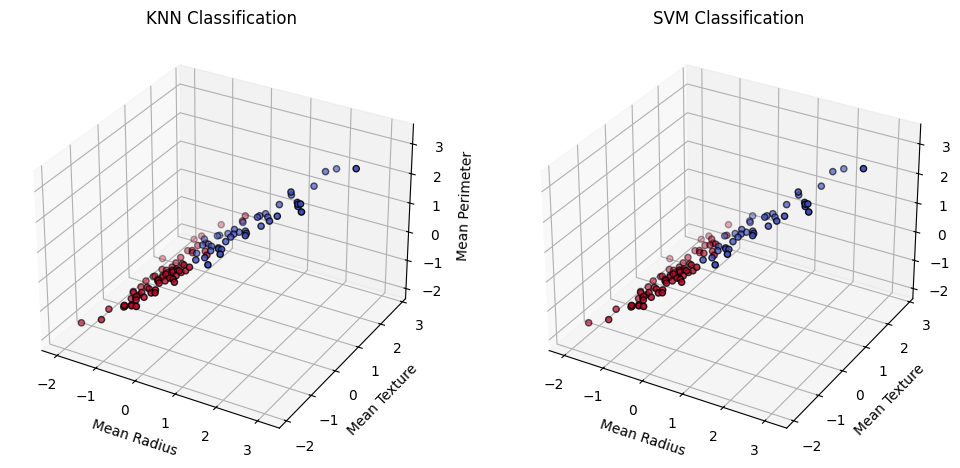

In [13]:

# 3D Plot of classification
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_knn, cmap='coolwarm', edgecolors='k')
ax.set_title('KNN Classification')
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_zlabel('Mean Perimeter')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_svm, cmap='coolwarm', edgecolors='k')
ax.set_title('SVM Classification')
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_zlabel('Mean Perimeter')

plt.show()